In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve


def dr(*x, p = 3):
    display(np.round(x, p))

In [2]:
A_metal = 4.08
# a_metal = np.array(((1/np.sqrt(2), 1/np.sqrt(2), 0), (1/np.sqrt(2), 0, 1/np.sqrt(2)), (0, 1/np.sqrt(2), 1/np.sqrt(2))))

# dr(a_metal)

# a_metal *= A_metal

# dr(a_metal)

# with a_metal as a:
#     V_metal = np.dot(a[0], np.cross(a[1], a[2]))

# dr(V)

# a_ = 2*np.pi/V * np.array((np.cross(a[1],a[2]), np.cross(a[0], a[2]), np.cross(a[0], a[1])))

# dr(a_)

# X = np.array((0, 0, 1)) * A
# L = np.array((0.5, 0.5, 0.5)) * A
# K = np.array((0.75, 0.75, 0)) * A

# dr(X, L, K)

In [3]:
TD = 165
Tpl = 1337
a = A_metal * 10**-10

0.16530181818181822 1.653018181818182e-07 2.04e-08


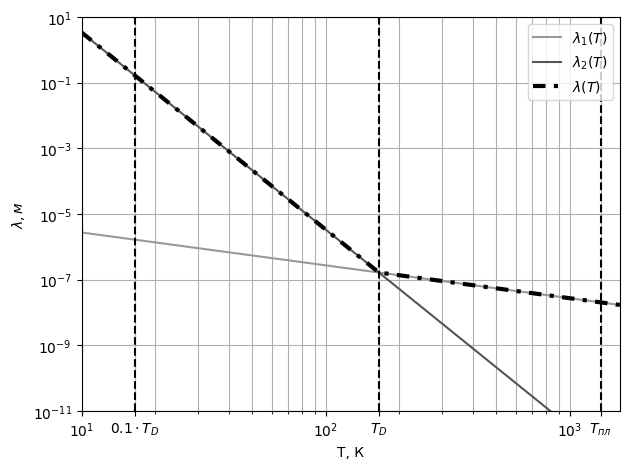

In [4]:
T = np.logspace(1, np.log10(Tpl*1.2), 100)

def h1(T):
    return 50*a*Tpl/T

def h2(T):
    return h1(T)*(TD / T)**5

def h(T):
    if T > TD:
        return h1(T)
    
    return h2(T)
    
fig, ax = plt.subplots()

ax.plot(T, list(map(h1, T)), color='#999', label=r'$\lambda_1(T)$')
ax.plot(T, list(map(h2, T)), color='#555', label=r'$\lambda_2(T)$')
ax.plot(T, list(map(h, T)), 'k', linestyle=(0,(3,2,1,2)), linewidth=3, label=r'$\lambda(T)$')

ax.set_ylim(10**-11, 10)

ax.vlines((0.1*TD, TD, Tpl), *ax.get_ylim(), linestyles='--', colors='k')
ax.set_xlim(10, T[-1])

ax.legend()


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks((10, TD*0.1, 100, TD, 1000, Tpl))
ax.set_xticklabels(('$10^1$', r'$0.1 \cdot T_D$', '$10^2$', '$T_D$', '$10^3$', '$T_{пл}$'))

ax.set_xlabel("T, К")
ax.set_ylabel(r"$\lambda, м$")

ax.grid(which="both")

fig.tight_layout()

print(h(0.1*TD), h(TD), h(Tpl))

vF 3194215.0097415945
h 9.990769230769232e-08
tf 3.1277697964287836e-14
ts 2.282156843862352e-15
td 2.461778939492735e-15
1.2773091315258907e-16
[9.999806768411713e-13, 4.92040452983814e-14, 6.34601653329549e-15]
[9.999980676505119e-14, 3.410230365430928e-14, 6.003151637409561e-15]
[9.999998067647152e-15, 8.380576583604518e-15, 3.8974325590432934e-15]


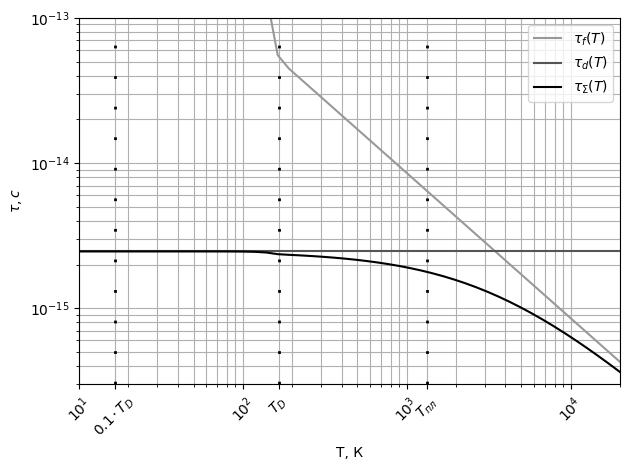

In [5]:
h_pl = 6.6237 * 10**-34
n0 = 7.08 * 10**29
me = 9.1 * 10**-31
e = 1.6*10**-19
rho = 2.2*10**-8

# td = 7*10**-14

vF = h_pl*(3*(np.pi**2)*n0)**(1/3)/(2*np.pi*me)

def tf(T):
    return h(T)/vF

ts273 = me/(rho*(e**2)*n0)

td273 = 1/(1/ts273 - 1/tf(273))
# td273 = 7*10**-12

def ts(T, td = td273):
    return 1/(1/td+1/tf(T))

print('vF', vF)
print('h', h(273))
print('tf', tf(273))
print('ts', ts273)
print('td', td273)

print(A_metal*10**-10/vF)

fig, ax = plt.subplots()

T = np.logspace(1, np.log10(2*10**4))

ax.plot(T, list(map(tf, T)), color='#999', label=r'$\tau_f(T)$')
ax.plot(T, [td273] * len(T), color='#555', label=r'$\tau_d(T)$')
ax.plot(T, list(map(ts, T)), 'k', label=r'$\tau_\Sigma(T)$')

ax.set_ylim(3*10**-16, 10**-13)

ax.vlines((0.1*TD, TD, Tpl), *ax.get_ylim(), linestyles=(0, (1, 10)), colors='k', linewidth=2)
ax.set_xlim(10, T[-1])

ax.legend()

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xticks((10, TD*0.1, 100, TD, 1000, Tpl, 10000))
ax.set_xticklabels(('$10^1$', r'$0.1 \cdot T_D$', '$10^2$', '$T_D$', '$10^3$', '$T_{пл}$', '$10^4$'))

ax.tick_params(axis='x', labelrotation = 45)

ax.set_xlabel("T, К")
ax.set_ylabel(r"$\tau, с$")

ax.grid(which="both")

fig.tight_layout()

for tau_d in (10**-12, 10**-13, 10**-14):
    print([ts(T, tau_d) for T in (0.1*TD, TD, Tpl)])


2.449482062419317e-08
[(19916977771.00095, 10.299223438658192), (980014813.4330806, 8.991232640328844), (126395912.59634517, 8.10173302991508)]
[(1991732415.005714, 9.299230991470994), (679227948.652335, 8.83201554781269), (119566948.12936352, 8.07761114429435)]
[(199173587.88625395, 8.2992317467595), (166918982.92584085, 8.222505729795717), (77626577.63312955, 7.89001043959881)]
[8049.736164965731, 3960.8723655757485, 4139.412441329386]
[804.9876159097746, 2745.19851625431, 3915.7667561536655]
[80.49890158778761, 674.6273400143037, 2542.2374397389285]


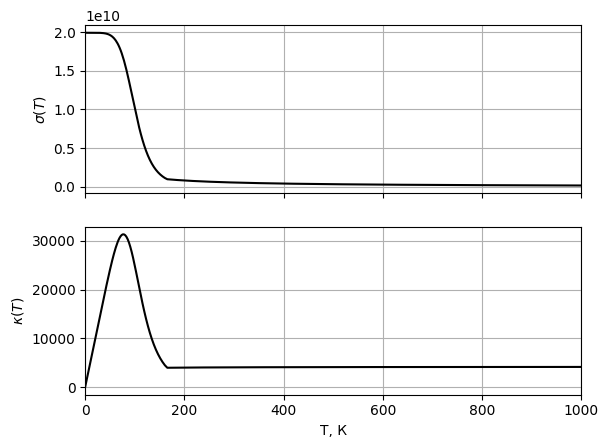

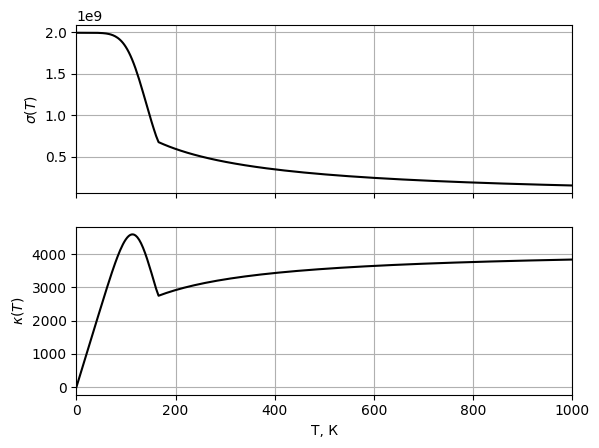

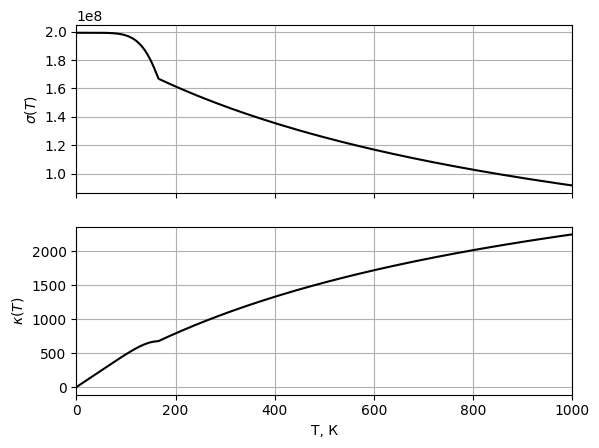

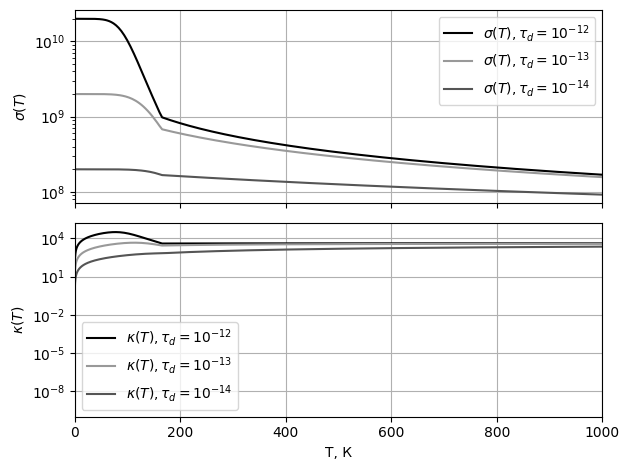

In [6]:
k0 = 1.3806*10**-23

L0 = 1/3 *(np.pi*k0/e)**2

print(L0)

def sigma(T, td):
    return e**2*n0*ts(T, td)/me

def kappa(T, td):
    return L0*T*sigma(T, td)

T = np.logspace(-10, 3, 1000)

for tau_d in (10**-12, 10**-13, 10**-14):
    fig, (ax1, ax2) = plt.subplots(2, sharex=True)

    ax1.plot(T, list(map(lambda t: sigma(t, tau_d), T)), 'k')

    ax2.plot(T, list(map(lambda t: kappa(t, tau_d), T)), 'k')

    ax2.set_xlim(0, 1000)

    ax1.set_ylabel(r'$\sigma(T)$')
    ax2.set_ylabel(r'$\kappa(T)$')
    ax2.set_xlabel('T, К')

    ax1.grid()
    ax2.grid()



fig, (ax1, ax2) = plt.subplots(2, sharex=True)

colors=('#000', '#999', '#555')

for i, p in enumerate((-12, -13, -14)):

    ax1.plot(T, list(map(lambda t: sigma(t, 10**p), T)), color=colors[i], label=rf'$\sigma(T), \tau_d = 10^{{{p}}}$')

    ax2.plot(T, list(map(lambda t: kappa(t, 10**p), T)), color=colors[i], label=rf'$\kappa(T), \tau_d = 10^{{{p}}}$')

    ax2.set_xlim(0, 1000)

ax1.set_ylabel(r'$\sigma(T)$')
ax2.set_ylabel(r'$\kappa(T)$')
ax2.set_xlabel('T, К')

ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.legend()
ax2.legend()

ax1.grid()
ax2.grid()

fig.tight_layout()

for tau_d in (10**-12, 10**-13, 10**-14):
    print([(sigma(T, tau_d), np.log10(sigma(T, tau_d))) for T in (0.1*TD, TD, Tpl)])
for tau_d in (10**-12, 10**-13, 10**-14):
    print([kappa(T, tau_d) for T in (0.1*TD, TD, Tpl)])

/tmp/ipykernel_3418/4170067680.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks())


1.125 6.12e-08


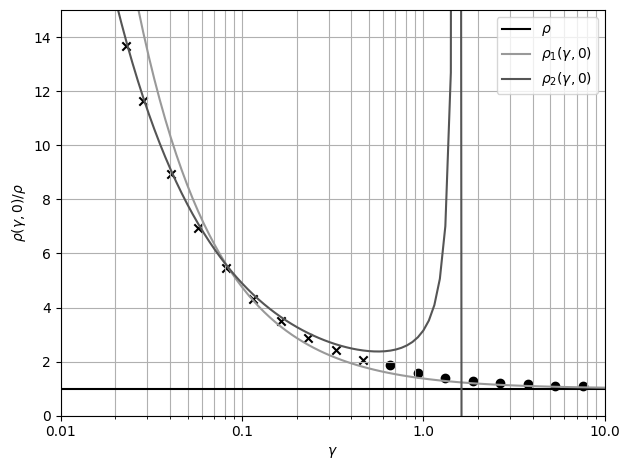

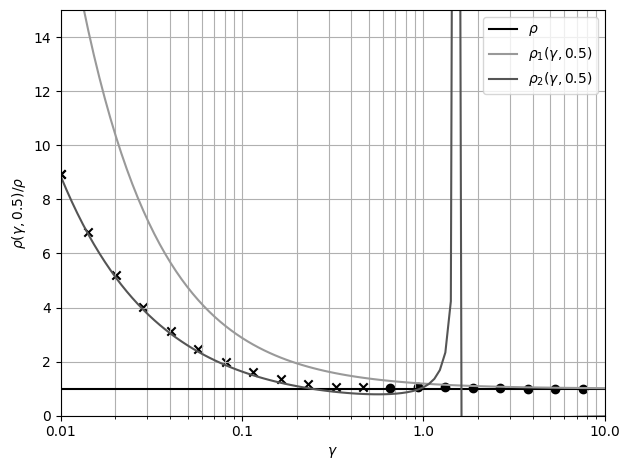

In [7]:
def rho1(gamma, p):
    return rho*(1+3/(8*gamma)*(1-p))

def rho2(gamma, p):
    return rho*(4/(3*gamma*(np.log(1/gamma)+0.423))*(1-p)/(1+p))

gamma = np.logspace(-2, 1, 100)

for p in (0, 0.5):
    fig, ax = plt.subplots()

    ax.plot(gamma, [rho/rho] * len(gamma), label=r'$\rho$', color='k')
    ax.plot(gamma, list(map(lambda g: rho1(g, p)/rho, gamma)), color='#999', label=rf'$\rho_1(\gamma, {p})$')
    ax.plot(gamma, list(map(lambda g: rho2(g, p)/rho, gamma)), color='#555', label=rf'$\rho_2(\gamma, {p})$')

    gi = np.array((0.023 if p==0 else 0.01, *gamma[::5]))

    scaler = 0.1 if p == 0 else -0.08

    ax.scatter(gi[gi > 0.55], list(map(lambda g: rho1(g, p)/rho + scaler/(g-0.55)**(0.5), gi[gi > 0.55])), marker='o', c='k')

    ax.scatter(gi[gi < 0.55], list(map(lambda g: rho2(g, p)/rho - scaler/(0.55-g)**(0.5), gi[gi < 0.55])), marker='x', c='k')

    # ax.scatter(d[::11], list(map(lambda d: rho1(d, p) if d/h(Tpl) > 0.55 else rho2(d, p), d[::11])))

    ax.set_ylim(0, 15)
    ax.set_xlim(np.min(gamma), np.max(gamma))

    ax.set_xscale('log')

    ax.set_xticklabels(ax.get_xticks())

    ax.set_xlabel(r'$\gamma$')
    ax.set_ylabel(fr'$\rho(\gamma, {p})/\rho$')

    ax.legend()
    ax.grid(which="both")

    fig.tight_layout()

print(rho1(3, 0)/rho, 3*h(Tpl))


mn 1.2103e-32
mp 5.46e-31


(0.0, 5.569410568277869e-20)

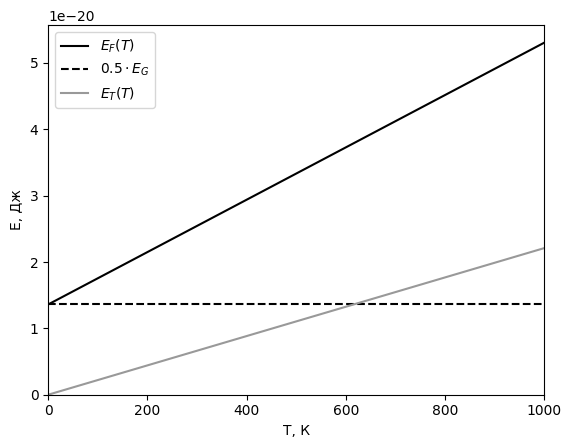

In [8]:
mn = 0.0133*me
mp = 0.6*me

EG = 0.17 * e

print('mn', mn)
print('mp', mp)

def EF(T):
    return 0.5*EG+3/4*k0*T*np.log(mp/mn)

fig, ax = plt.subplots()

ax.plot(T, list(map(EF, T)), 'k', label='$E_F(T)$')

ax.plot(T, [EF(0)]*len(T), 'k', linestyle='--', label=r'$0.5 \cdot E_G$')

ax.plot(T, list(map(lambda t: k0*t*1.6, T)), color='#999', label='$E_T(T)$')

ax.set_xlabel("T, К")
ax.set_ylabel("E, Дж")

ax.legend()

ax.set_xlim(np.min(T), np.max(T))
ax.set_ylim(0, ax.get_ylim()[1])

1.5572100270608516e-20 2.3460501353042574e-20 2.5432601623651087e-20


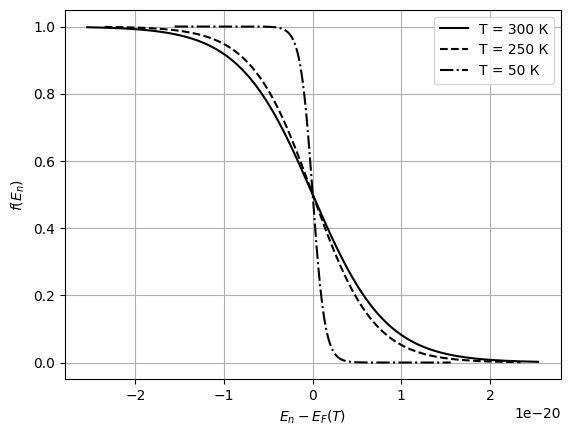

In [9]:
def fa(En, T):
    return 1/(np.exp((En-EF(T))/(k0*T))+1)

fig, ax = plt.subplots()

En = np.linspace(0, EF(300)*2, 1000)

print(EF(50), EF(250), EF(300))

styles = {300: '-', 250: '--', 50: '-.'}

for t in (300, 250, 50):
    En = np.linspace(0, EF(t)*2, 1000)
    
    ax.plot(En-EF(t), list(map(lambda E: fa(E, t), En)), 'k' + styles[t], label=f'T = {t} К')

ax.set_ylabel("$f(E_n)$")
ax.set_xlabel("$E_n - E_F(T)$")

ax.legend()

ax.grid()

0.085 0.09732562669130322 0.15895376014781928 0.41458725772544797 7.464e-19
7.990326016236512e-19 4.1417999999999996e-21


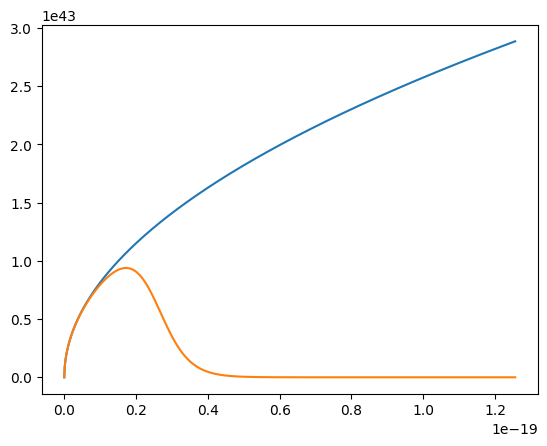

In [10]:
def EFa(T):
    return EF(0)*(1-np.pi**2/12*(k0*T/EF(0))**2)

def g(Eps):
    return 2*np.pi*(2*mn)**(3/2)/h_pl**3*Eps**(1/2)

def N(Eps):
    return g(Eps)*fa(Eps, 300)

fig, ax = plt.subplots()

Eps = np.linspace(0, 10*EFa(300), 1000)

ax.plot(Eps, list(map(g, Eps)))
ax.plot(Eps, list(map(N, Eps)))
# ax.plot(Eps, list(map(lambda x: np.exp(x), Eps)))
# ax.plot(Eps, list(map(lambda x: np.exp(x)/(0.3*np.exp(x)+1), Eps)))

Ec = 4.665*e

print(EF(0)/e, EF(50)/e, EF(300)/e, EF(Tpl)/e, Ec)

print(4.835*e+EF(300), k0*300)

# if True:
#     T = np.linspace(1, 1000)
#     ax.plot(T, list(map(lambda t: (EF(t))/(k0*t), T)))
#     ax.set_yscale('log')

# def Nc(T):
#     return 

# print(Eg/(k0*np.log(Nc(0)*Nv(0)/Nd**2)))

Text(0.5, 0, '$T^{-1}$')

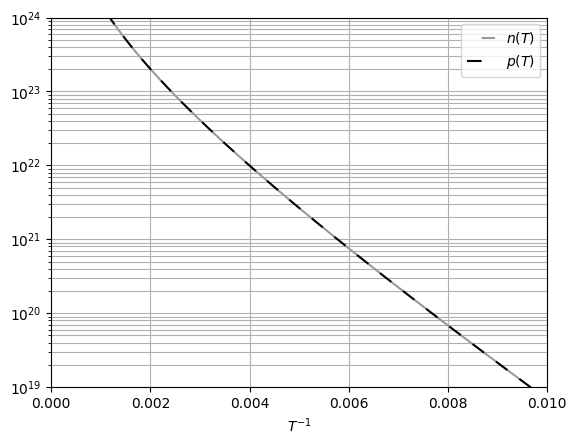

In [11]:
def n0(T):
    return 2*((2*np.pi*mn*k0*T)/h_pl**2)**(3/2)*np.exp((EF(T)-EG)/(k0*T))

def p0(T):
    return 2*((2*np.pi*mp*k0*T)/h_pl**2)**(3/2)*np.exp((-EF(T))/(k0*T))
    
fig, ax = plt.subplots()

T = np.linspace(50, 1000, 1000)

ax.plot(T**-1, list(map(n0, T)), c='#999', linestyle=(7, (7, 7)), label='$n(T)$')
ax.plot(T**-1, list(map(p0, T)), 'k', linestyle=(0, (7, 7)), label='$p(T)$')

ax.set_yscale('log')

ax.set_xlim(0, 10**-2)

ax.set_ylim(10**19, 10.0**24)

ax.legend()

ax.grid(which='both')

ax.set_xlabel('$T^{-1}$')

147.95825436672482 365.6284735670228


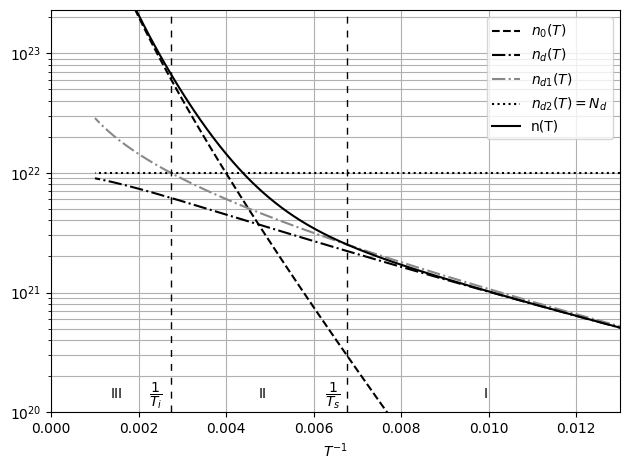

In [12]:
Eg = 0.03 * e

Nd = 10**22

def nd(T):
    return (2*Nd)/(1+np.sqrt(1+(8*Nd/(2*(2*np.pi*mn*k0*T/h_pl**2)**(3/2)))*np.exp(Eg/(k0*T))))

def nd1(T):
    return np.sqrt(1/2*Nd*2*((2*np.pi*mn)/h_pl**2)**(3/2))*(k0*T)**(3/4)*np.exp(-Eg/(2*k0*T))

def n(T):
    return n0(T) + nd(T)

Ts = fsolve(lambda x: nd1(x[0]) - n(x[0]), [1/0.007])[0]
Ti = fsolve(lambda x: nd1(x[0]) - Nd, [400])[0]

print(Ts, Ti)

fig, ax = plt.subplots()

ax.set_xlim(0, 0.013)
ax.set_ylim(10.0**20, 2.3*10.0**23)

ax.plot(T**-1, list(map(n0, T)), 'k--', label='$n_0(T)$')
ax.plot(T**-1, list(map(nd, T)), 'k-.', label='$n_d(T)$')
ax.plot(T**-1, list(map(nd1, T)), '-.', c='#888', label='$n_{d1}(T)$')

ax.plot(T**-1, [Nd]*len(T), 'k', linestyle='dotted', label='$n_{d2}(T) = N_d$')
ax.plot(T**-1, list(map(n, T)), 'k', label='n(T)')

ax.vlines([1/Ts, 1/Ti], *ax.get_ylim(), colors='k', linestyles=(0, (5, 5)), linewidth=1)

ax.annotate(r'$\dfrac{1}{T_s}$', (1/Ts-0.0005, 1.3*10.0**20))
ax.annotate(r'$\dfrac{1}{T_i}$', (1/Ti-0.0005, 1.3*10.0**20))

ax.text(1/Ts+(ax.get_xlim()[1]-1/Ts)/2, 1.3*10.0**20, 'I')
ax.text(1/Ti+(1/Ts-1/Ti)/2, 1.3*10.0**20, 'II')
ax.text(1/Ti/2, 1.3*10.0**20, 'III')

ax.set_yscale('log')

ax.legend()

ax.grid(which='both')

ax.set_xlabel('$T^{-1}$')

fig.tight_layout()

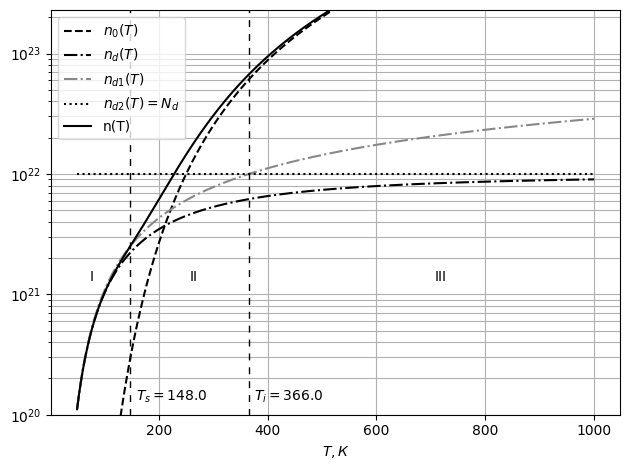

In [13]:
fig, ax = plt.subplots()

ax.plot(T, list(map(n0, T)), 'k--', label='$n_0(T)$')
ax.plot(T, list(map(nd, T)), 'k-.', label='$n_d(T)$')
ax.plot(T, list(map(nd1, T)), '-.', c='#888', label='$n_{d1}(T)$')

ax.plot(T, [Nd]*len(T), 'k', linestyle='dotted', label='$n_{d2}(T) = N_d$')
ax.plot(T, list(map(n, T)), 'k', label='n(T)')

ax.vlines([Ts, Ti], *ax.get_ylim(), colors='k', linestyles=(0, (5, 5)), linewidth=1)

ax.text(Ti+(ax.get_xlim()[1]-Ti)/2, 1.3*10.0**21, 'III')
ax.text(Ts+(Ti-Ts)/2, 1.3*10.0**21, 'II')
ax.text(Ts/2, 1.3*10.0**21, 'I')

ax.annotate('$T_s = $' + str(np.round(Ts)), (Ts+10, 1.3*10.0**20))
ax.annotate('$T_i = $' + str(np.round(Ti)), (Ti+10, 1.3*10.0**20))

ax.set_yscale('log')

ax.legend()

ax.grid(which='both')

ax.set_xlabel('$T, К$')

# ax.set_xlim(0, 0.013)
ax.set_ylim(10.0**20, 2.3*10.0**23)

fig.tight_layout()

115.36515432619332


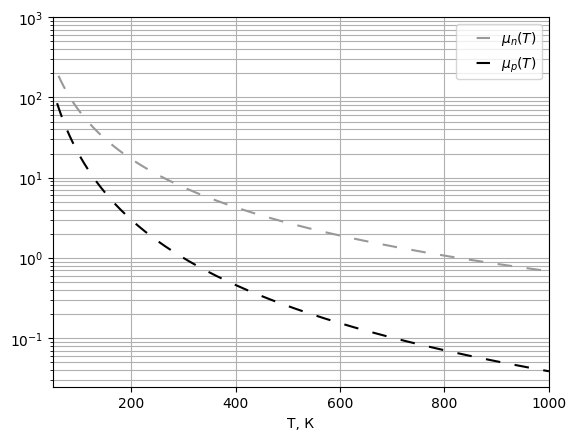

In [14]:
def mun(T):
    return 76000*10**-4*(T/300)**-2

def mup(T):
    return 5000**10**-4*(T/300)**-2.7

fig, ax = plt.subplots()

ax.plot(T, list(map(mun, T)), c='#999', linestyle=(7, (7, 7)), label=r'$\mu_n(T)$')
ax.plot(T, list(map(mup, T)), c='#000', linestyle=(7, (7, 7)), label=r'$\mu_p(T)$')

ax.set_yscale('log')

ax.legend()

ax.set_xlim(50, 1000)
ax.set_ylim(ax.get_ylim()[0], 10**3)

ax.set_xlabel('T, К')

ax.grid(which='both')

print(mun(77))

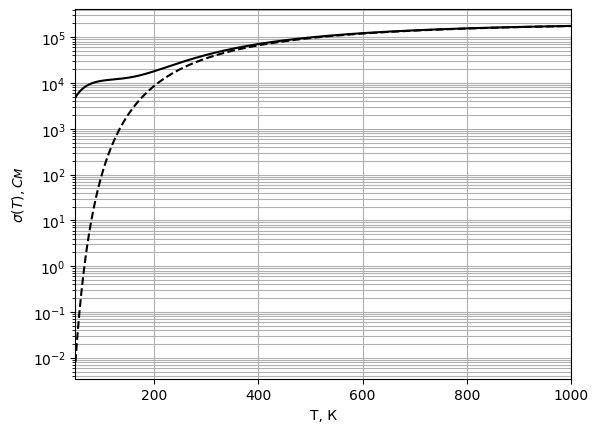

In [15]:
def sigma(T):
    return e*n(T)*mun(T) + e*p0(T)*mup(T)

def sigma0(T):
    return e*n0(T)*mun(T) + e*p0(T)*mup(T)

fig, ax = plt.subplots()

ax.plot(T, list(map(sigma, T)), 'k', label=r'$\sigma(T)$')
ax.plot(T, list(map(sigma0, T)), 'k--', label=r'$\sigma_0(T)$')

ax.set_yscale('log')

ax.set_xlim(50, 1000)

ax.set_xlabel('T, К')
ax.set_ylabel(r'$\sigma(T), См$')

ax.grid(which='both')

In [16]:
chi = 4.665*e

def Phin_s(T):
    return chi + EF(T)

def Nc(T):
    return 2*(mn*k0*T/(2*np.pi*h_pl**2))**(3/2)

def EF_p(T):
    return (EG+Eg)/2 + 1/2 * k0 * T * np.log(Nd/(2*Nc(T)))

def Phin_p(T):
    return chi + k0*T*np.log(Nc(T)/Nd)

for T in (0.1*TD, TD, Tpl):
    print(EF(T), Phin_s(T), EF_p(T), Phin_p(T))
    print(EF(T)/e, Phin_s(T)/e, EF_p(T)/e, Phin_p(T)/e)

1.4250793089300812e-20 7.606507930893009e-19 1.689112988123594e-20 7.444598420029438e-19
0.08906745680813007 4.75406745680813 0.10556956175772461 4.6528740125183985
2.0107930893008098e-20 7.665079308930082e-19 2.0977349450367212e-20 7.348663187534218e-19
0.1256745680813006 4.7906745680813 0.13110843406479505 4.5929144922088865
6.633396123607168e-20 8.127339612360717e-19 2.7366739214353514e-20 7.108719797749712e-19
0.41458725772544797 5.079587257725447 0.17104212008970945 4.4429498735935695


4.937450473004247e-15
2.7255474336441733e-15
1.0971095076797715e-22


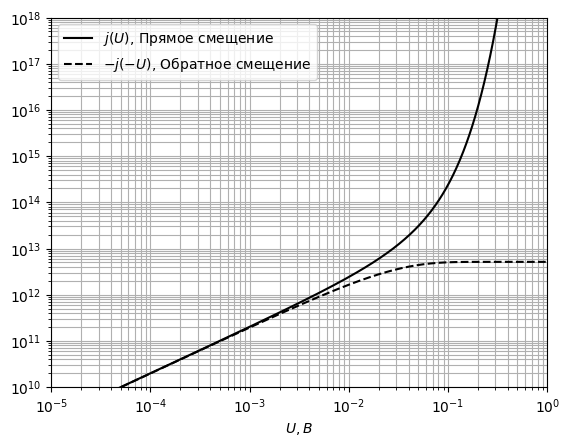

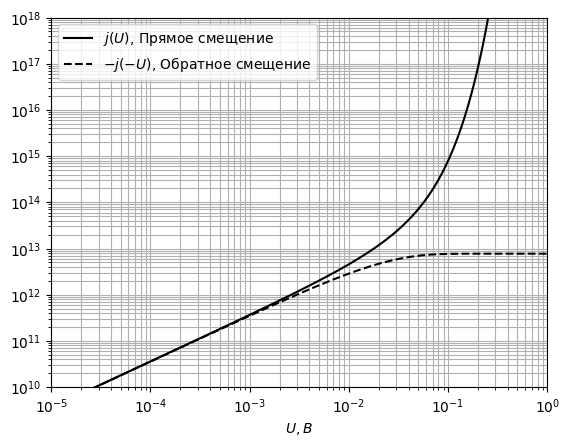

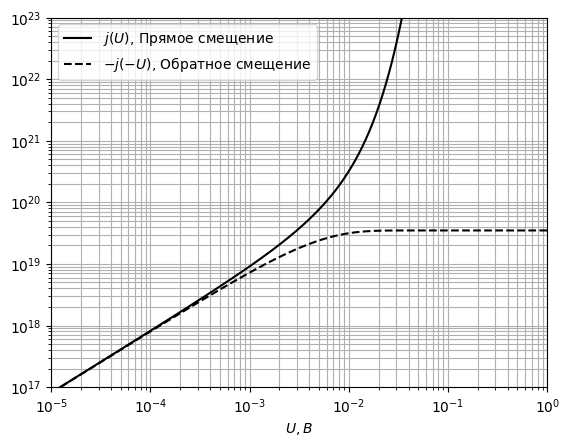

In [17]:
ephik = -0.1*e
A = 4*np.pi*e*me*k0**2/h_pl**3

lims = {300: (10, 18), 250: (10, 18), 50: (17, 23)}

for T in (300, 250, 50):
    js = A*T**2*np.exp(-ephik/(k0*T))

    def j(U):
        return js*(np.exp(e*U/(k0*T))-1)

    fig, ax = plt.subplots()

    U = np.logspace(-5,0, 1000)

    ax.plot(U, list(map(j, U)), 'k', label=r'$j(U)$, Прямое смещение')
    ax.plot(U, list(map(lambda x: -j(-x), U)), 'k--', label=r'$-j(-U)$, Обратное смещение')

    print((10**-3)/j((10**-3)))

    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.set_ylim(10.**lims[T][0], 10.**lims[T][1])

    ax.set_xlim(np.min(U), np.max(U))

    ax.set_xlabel('$U, В$')
        # ax.set_ylabel(r'$j(U)$')

    ax.legend()

    ax.grid(which='both')

In [18]:
PHI = 4.75*e

epsilon0 = 8.85*10**-12
epsilon = 17.72

for T in (300,):
    v = np.sqrt(3*k0*T/mn)

    E = mn*v**2/2

    print(v, E)

    def W(D):
        return -h_pl*np.log(D)/(2*(PHI-chi-E))

    def N(W):
        return 2*epsilon0*epsilon*ephik/(W*e)**2

    for D in (0.1, 0.01):
        print(W(D))

        print(N(W(D)))

1013231.4758388158 6.212699999999999e-21
1.0322873634795202e-13
-1.8395677158075775e+34
2.0645747269590405e-13
-4.5989192895189437e+33


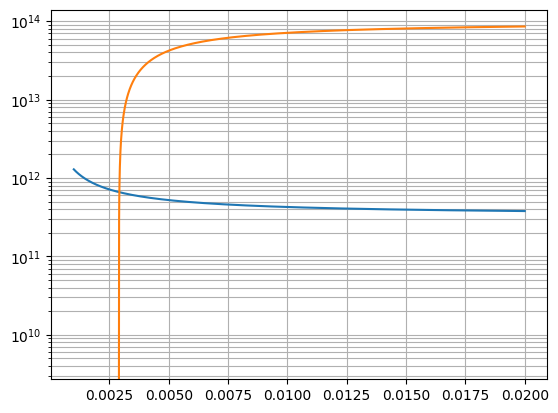

In [19]:
def n(T):
    return 1/(3*np.pi**2)*(2*np.pi*mn/h_pl**2)**(3/2)*(EF(T))

def p(T):
    return 1/(3*np.pi**2)*(2*np.pi*mp/h_pl**2)**(3/2)*(EG-EF(T))

fig, ax = plt.subplots()

T = np.linspace(50, 1000, 1000)

ax.plot(T**-1, np.array(list(map(n, T)))/10**20)
ax.plot(T**-1, np.array(list(map(p, T)))/10**20)

# ax.set_xlim(0, 10**-2)

# ax.set_ylim(4*10**11, 10.0**12)

ax.set_yscale('log')

ax.grid(which='both')